# Final Exam

- **Subject:** Computational Physics I
- **Date:** Tuesday 8 August 2023
- **Credits:** 30 points
- **Number of problems:** 3
- **Type of evaluation:** Final Exam

## Instructions:

- When you finish, please send your .ipynb file via email to wbanda@yachaytech.edu.ec


- The exam is open-book, **individual**, and has two parts:

**Part 1** should be submitted by the end of the class today.

        
**Part 2** can be submitted by Wednesday 9th August (by 17h00). **Late submissions won't be accepted.**


- You can call your notebook with your surname, e.g. name.ipynb, and also include your name in the notebook.


- Within a **single python notebook**, add the following:

## PART 1 (in class)

## Name: Gabriel Balarezo

## 1. (9 points): Describing weather balloon flight

Weather balloons are used to study the atmospheric conditions in specific geographical locations. They carry several instruments on board, which collect data on atmospheric pressure, temperature, wind speed, etc, which are send back to the ground using radio frequencies.

This problem consists on reading a data file collected by one of such balloons (the Eagle weather balloon, see: https://datamillnorth.org/dataset/weather-balloon-data) with the aim of understanding the correlations between atmospheric parameters and the balloon flight dynamics.

#### Download data file:

https://github.com/wbandabarragan/computational-physics-1/blob/main/exams/data_sets/weather-balloon-data.csv

#### Data I/O / manipulation:

(a) Create a python function that uses pandas to open the CSV data file containing the information on the Eagle weather balloon flight and returns the following arrays:

- time
- altitude
- pressure


(b) Inspect the data arrays. You will notice that the time stamps are given as: "HH:MM:SS", so you should convert them into seconds. Create a python function that takes the "HH:MM:SS" strings and returns the time in seconds (**Hint:** you can use the **time_str.split()** function for this).

(c) Use your function from (b) to convert the time vector to seconds. **Hint:** the original time stamps are strings, so you would probably need a for loop for this.


#### 1D pressure model via regression:

(d) Now, you are going to create a 1D pressure model. Make a plot of pressure in the Y axis versus altitude in the X axis. Write down a physically motivated model with free parameters to describe the data. **Hint:** you have done something similar in CW2.

(e) Carry out a regression to fit the data and find the free parameters in your model. Report the resulting function, and make a labeled plot showing the data and the fit.

#### Balloon dynamics:

(f) In this section, you will study the dynamics of the balloon. Make a plot of altitude in the Y axis versus time in the X axis. Briefly describe what you see.

(g) Determine and print the time stamp at which the baloon reached its highest altitude. How long did it take it to arrive there?

(h) Calculate the vertical velocity and acceleration of the balloon.

(i) Make a 3-panel figure showing 3 plots: one for the height, one the vertical velocity and one for the acceleration, all versus time. What kind of motion does the balloon follow?

In [1]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.signal as ss
from skimage.feature import peak_local_max
from PIL import Image, ImageDraw

#### Data I/O / manipulation:

#### (a)
Create a python function that uses pandas to open the CSV data file containing the information on the Eagle weather balloon flight and returns the following arrays:

- time
- altitude
- pressure


In [2]:
# Part a 
def read_file(filename):
    
    df = pd.read_csv(filename)
    
    time = np.array(df['Time (hh:mm:ss)'])
    altitude = np.array(df['Altitude (meters)'])
    pressure = np.array(df['Pressure (pascals)'])
    
    return time, altitude, pressure

In [3]:
time, altitude, pressure = read_file('./weather-balloon-data.csv')

#### (b)
Inspect the data arrays. You will notice that the time stamps are given as: "HH:MM:SS", so you should convert them into seconds. Create a python function that takes the "HH:MM:SS" strings and returns the time in seconds (**Hint:** you can use the **time_str.split()** function for this).



In [4]:
print(time)
print(altitude)
print(pressure)

['09:13:00' '09:13:06' '09:13:12' ... '12:14:48' '12:14:54' '12:15:00']
[380 380 380 ...  79  79  79]
[96618 96623 96613 ... 99939 99949 99941]


In [5]:
# Transform time to seconds 
def time_to_seconds(time_str):
    """
    Function to transform HH:MM:SS time format to seconds.
    Input: time_str
    Output:total_seconds
    """
    hours, minutes, seconds = map(int, time_str.split(':'))
    total_seconds = hours * 3600 + minutes * 60 + seconds
    return total_seconds

#### (c)
Use your function from (b) to convert the time vector to seconds. **Hint:** the original time stamps are strings, so you would probably need a for loop for this.

In [6]:
# Apply the time_to_seconds function to the array using a vectorized operation

time_sec = np.vectorize(time_to_seconds)(time)

print(time_sec)

[33180 33186 33192 ... 44088 44094 44100]


#### 1D pressure model via regression:


#### (d)
Now, you are going to create a 1D pressure model. Make a plot of pressure in the Y axis versus altitude in the X axis. Write down a physically motivated model with free parameters to describe the data. **Hint:** you have done something similar in CW2.


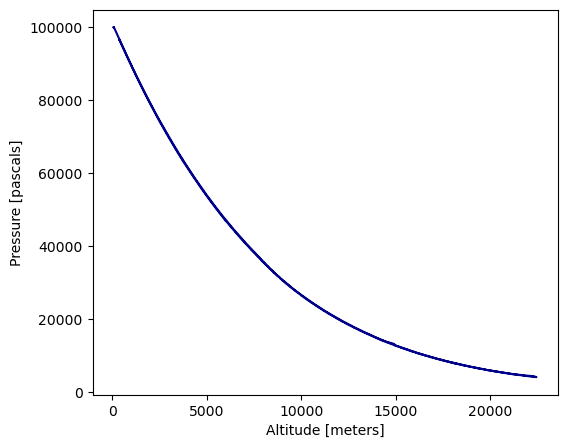

In [7]:
# Ploting 
fig, ax = plt.subplots(figsize = (6, 5))

ax.plot(altitude, pressure, color = 'darkblue')

ax.set_xlabel('Altitude [meters]')
ax.set_ylabel('Pressure [pascals]')

plt.show()

We can notice that the pressure is reducing with altitude, so we can model this with an exponential

$$P = P_0\,e^{-b\,(h-h_0)}$$

We will expect the pressure to go to zero as the altitude increases, and also the pressure must go to some $P_0$ as the altitude decreases.

#### (e)  
Carry out a regression to fit the data and find the free parameters in your model. Report the resulting function, and make a labeled plot showing the data and the fit.

In [8]:
# Writing the model 
def pressure_model(h, P0, b, h0):
    """
    Function to model the variation of the pressure 
    with the altitude.
    Input: h, P0, b, h0
    Output: P
    """
    P = P0 * np.exp(-b * (h - h0))
    
    return P

In [9]:
# Perform the regression
coef, cova = opt.curve_fit(pressure_model, altitude, pressure, p0 = [10000, 0.1, 80])

/tmp/ipykernel_9913/1019046127.py:9: RuntimeWarning: overflow encountered in exp
  P = P0 * np.exp(-b * (h - h0))
/tmp/ipykernel_9913/1019046127.py:9: RuntimeWarning: overflow encountered in multiply
  P = P0 * np.exp(-b * (h - h0))


In [10]:
print("The fitted coefficients are: ")
print(f"P0 = {coef[0]}", f"b = {coef[1]}", f"h0 = {coef[2]}")

The fitted coefficients are: 
P0 = 102950.42951441996 b = 0.00013527359546935155 h0 = 54.11591979333561


#### Resulting function

$$P = 102950.43\,\exp(-0.000135(h-54.12)) $$

In [11]:
# Evaluate our model with fitted parameters
fit_pressure = pressure_model(altitude, coef[0], coef[1], coef[2])

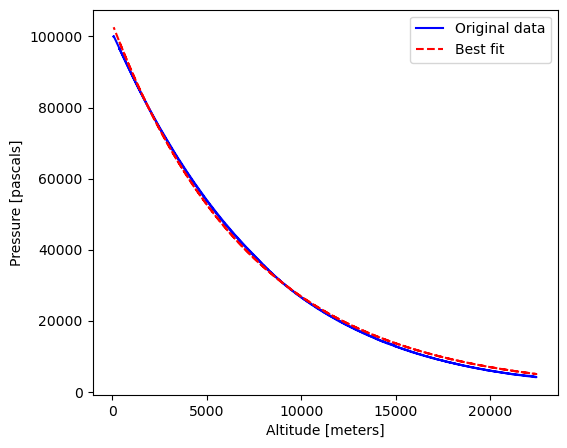

In [12]:
# Ploting 
fig, ax = plt.subplots(figsize = (6, 5))

ax.plot(altitude, pressure, color = 'blue', linestyle = '-', label = 'Original data')
ax.plot(altitude, fit_pressure, color = 'red', linestyle = '--', label = 'Best fit') 

ax.set_xlabel('Altitude [meters]')
ax.set_ylabel('Pressure [pascals]')

plt.legend()

plt.show()

#### Balloon dynamics:

#### (f)
In this section, you will study the dynamics of the balloon. Make a plot of altitude in the Y axis versus time in the X axis. Briefly describe what you see.


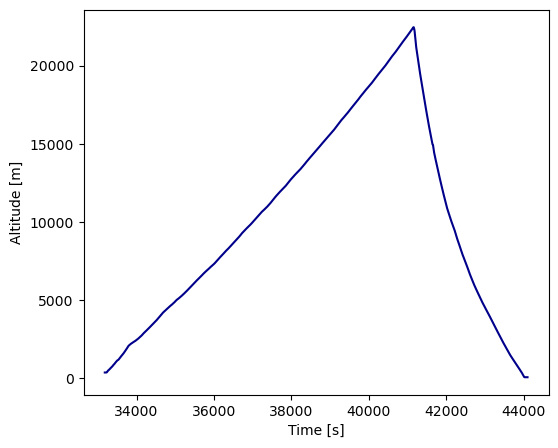

In [13]:
# Ploting 
fig, ax = plt.subplots(figsize = (6, 5))

ax.plot(time_sec, altitude, color = 'darkblue')

ax.set_xlabel('Time [s]')
ax.set_ylabel('Altitude [m]')

plt.show()

I can see that the balloon is going up and at a certain altitude it stops almost suddenly and starts to 
fall.

#### (g) 
Determine and print the time stamp at which the baloon reached its highest altitude. How long did it take it to arrive there?


In [14]:
# Find the index of the peak 
maxima = ss.argrelextrema(altitude, np.greater)
#check
print(maxima[0])

[1329]


In [15]:
# time stamp 
time_max = time_sec[1329]
print("The time at which the balloon reached its highest altitude is:")
print(f" Time [s] = {time_max}")
print("The highest altitude is:")
print(f"Max altitude: {altitude[1329]} meters")

The time at which the balloon reached its highest altitude is:
 Time [s] = 41154
The highest altitude is:
Max altitude: 22449 meters


In [16]:
# Compute the time it took to reach the peak 
time_spent = time_sec[1329] - time_sec[0]

print(f"It took {time_spent} seconds to reach the peak")

It took 7974 seconds to reach the peak


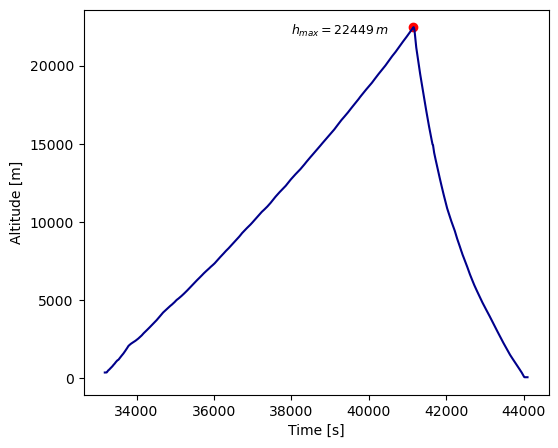

In [17]:
# Ploting 
fig, ax = plt.subplots(figsize = (6, 5))

ax.plot(time_sec, altitude, color = 'darkblue')
#ax.plot([time_sec[1329], time_sec[1329]], [0, altitude[1329]], linestyle = '--', color = 'blue')
ax.scatter(time_sec[1329], altitude[1329], color = 'red')

ax.text(38000, 22000, r"$h_{max} = 22449\,m$", fontsize = 9, color='black')

ax.set_xlabel('Time [s]')
ax.set_ylabel('Altitude [m]')

plt.show()

#### (h)
Calculate the vertical velocity and acceleration of the balloon.



In [18]:
# delta t
dt = time_sec[1] - time_sec[0]

# Computing the velocity
velocity = np.gradient(altitude, dt, axis=0)

# Computing the acceleration 
acceleration = np.gradient(velocity, dt, axis = 0)

#### (i) 
Make a 3-panel figure showing 3 plots: one for the height, one the vertical velocity and one for the acceleration, all versus time. What kind of motion does the balloon follow?

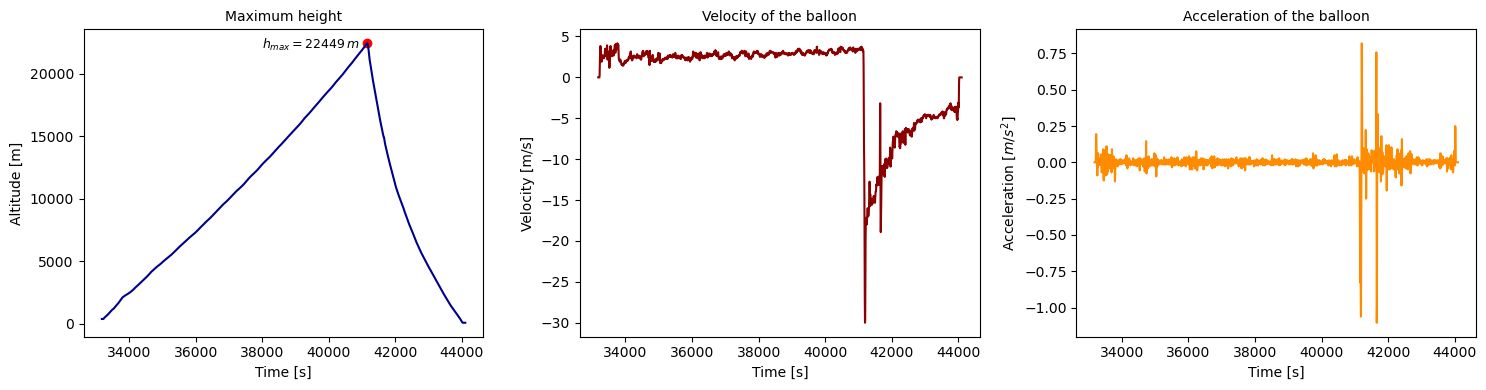

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Plot original density density data
ax[0].plot(time_sec, altitude, color = "darkblue")

ax[0].scatter(time_sec[1329], altitude[1329], color = 'red')

ax[0].text(38000, 22000, r"$h_{max} = 22449\,m$", fontsize = 9, color='black')
ax[0].set_title("Maximum height", fontsize = 10)
ax[0].set_xlabel("Time [s]")
ax[0].set_ylabel("Altitude [m]")

# Plot blured data 1
ax[1].plot(time_sec, velocity, color = "darkred")
    
ax[1].set_title("Velocity of the balloon", fontsize = 10)
ax[1].set_xlabel("Time [s]")
ax[1].set_ylabel("Velocity [m/s]")


# Plot blured data 2
ax[2].plot(time_sec, acceleration, color = "darkorange")
ax[2].set_title("Acceleration of the balloon", fontsize = 10)
ax[2].set_xlabel("Time [s]")
ax[2].set_ylabel(r"Acceleration $[m/s^2]$")

# Adjust the layout for better spacing between the subplots
plt.tight_layout()

plt.show()

We can see that the before reaching the highest point, the balloon is moving with constant velocity, therefore the acceleration is zero. But after reaching the highest point, the balloon desaccelerates very quick and starts to fall with some acceleration. We can see in the velocity plot, how the balloon reaches a negative velocity really quick, and in the acceleration plot we can see actually a negative peak, which corresponds to the sudden stop, and after this we can see a positive peak, corresponding to de acceleration the balloon has after the highest point. 

## 2. (11 points) : Understanding the Solar cycle

This problem consists of analysing the underlying periodity of the observed sunspots on the Sun (see some images here: https://en.wikipedia.org/wiki/Sunspot). The data file provided below contains the observed number of sunspots on the Sun for each month since January 1749 (month 1). The file contains two columns of numbers, the first representing the month and the second being the sunspot number.


#### Download data file:
https://github.com/wbandabarragan/computational-physics-1/blob/main/exams/data_sets/sunspots.txt

#### Sunspot count:

(a) Write a python function that reads the data in the file and returns two arrays:
- time
- sunspot count number

(b) Call your function above and make a labeled plot of number of sunspots as a function of time. 

(c) Briefly comment, what features do you see in the data? What physical mechanism do you think causes this behaviour?

#### Solar cycle - analysis 1:

(d) Here you will estimate the length of the Solar cycle in months in a very rough way. Write a function that finds the peaks of sunspot count and returns two arrays (jointly with a CSV file) for the:

- month where a peak was found
- respective sunspot count

(e) Call your function and report the peaks on the plot of sunspot count versus time.

(f) Write a funtion that calculates the average of the distance between consecutive peaks. Such average will be the first estimate for the length of the Solar cycle. Call your funtion and print the value.

#### Solar cycle - analysis 2:

(g) Now we will use a more professional approach, which relies on Fourier analysis. Write a function that computes the Fourier transform of the sunspot data and returns the Fourier power and the respective frequencies.

(h) Call your function and make a plot of the 1D Fourier power spectrum of the sunspot signal. Are there peaks at nonzero frequency values? What do they represent? 

(i) Find the frequency of the highest nonzero peak. Using this frequency, calculate and print the Solar cycle period and compare it to the one obtained in (f).

#### Fourier filtering:

(j) Write a function that filters outs all frequencies lower and higher than the frequency of the peak and returns the inverse Fourier transformed signal.

(k) Call your funtion and make a plot. Compare it to the original signal. What kind of signal do you get and why?


#### Rerefence:
Newman M, Computational Physics

#### Sunspot count:

#### (a)
Write a python function that reads the data in the file and returns two arrays:
- time
- sunspot count number



In [20]:
# Read the file 
def readfile(filename):
    """
    Function to read into the sunspot data file 
    ad return time and sunspot count vectors.
    Input: filename
    Output: time, sunspot
    """
    
    df = pd.read_csv(filename, sep='\t')
    
    time = np.array(df.iloc[:, 0])
    sunspot = np.array(df.iloc[:, 1])
    
    return time, sunspot

#### (b) 
Call your function above and make a labeled plot of number of sunspots as a function of time. 

In [21]:
# Call the function
time_month, sunspots = readfile('./sunspots.txt')

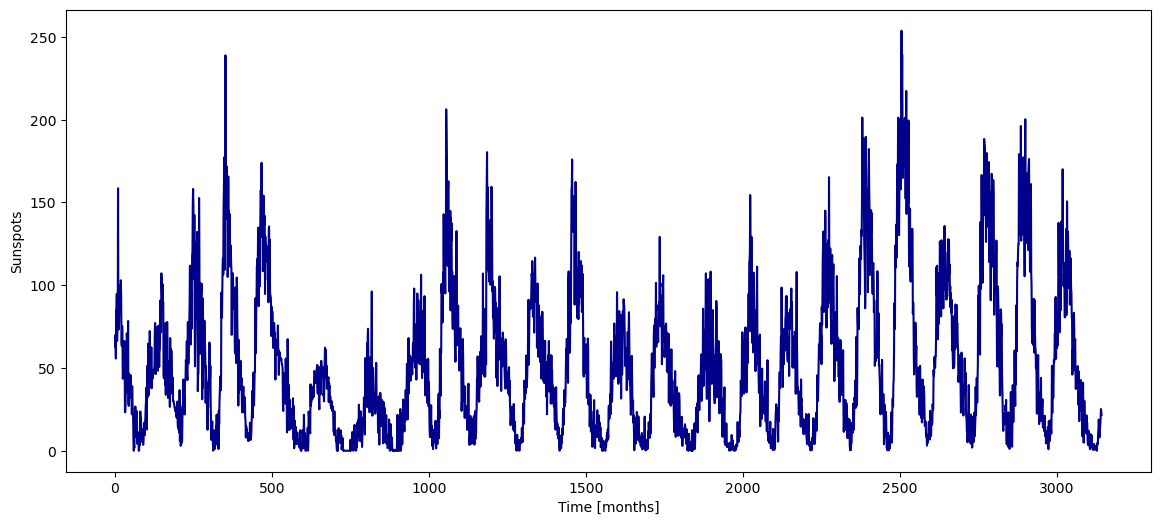

In [22]:
# Ploting 
fig, ax = plt.subplots(figsize = (14, 6))

ax.plot(time_month, sunspots, color = 'darkblue', linestyle = '-')

ax.set_xlabel('Time [months]')
ax.set_ylabel('Sunspots')

#ax.set_xlim(1000, 1500)

plt.show()

#### (c)
Briefly comment, what features do you see in the data? What physical mechanism do you think causes this behaviour?



From the plot, we can see that there are many peaks in the number of sunspots. Sun spots are created by magnetig fields, so this behaviour could be due to fluctuations in the magnetic field.

#### Solar cycle - analysis 1:

#### (d)
Here you will estimate the length of the Solar cycle in months in a very rough way. Write a function that finds the peaks of sunspot count and returns two arrays (jointly with a CSV file) for the:

- month where a peak was found
- respective sunspot count

In [23]:
# define the function 
def peaks_finder(sunspots):
    """
    Function to find the peaks in the sunspots array.
    Input: sunspots
    Output: month_peak, sunspot_peak, peaks.csv
    """
    # Find the peaks
    month_peak, _ = ss.find_peaks(sunspots, prominence = 50, distance = 60) # these parameters are based on visual inspection
    
    # Filter undisired peaks 
    month_peak = np.delete(month_peak, 5) # since there is an undesired peak
    
    # Compute the sunspot count
    sunspot_peak = sunspots[month_peak]
    
    # Create a pandas dataframe 
    new_df = pd.DataFrame({"Month": month_peak, "Sunspot": sunspot_peak})
    
    # Create the csv file 
    new_df.to_csv('peaks.csv', ",", float_format = '{:.4e}'.format)
    
    # return 
    return month_peak, sunspot_peak # The csv file is saved in the directory 

#### (e)
Call your function and report the peaks on the plot of sunspot count versus time.



In [24]:
# Call the function 
month_peak, sunspot_peak = peaks_finder(sunspots)

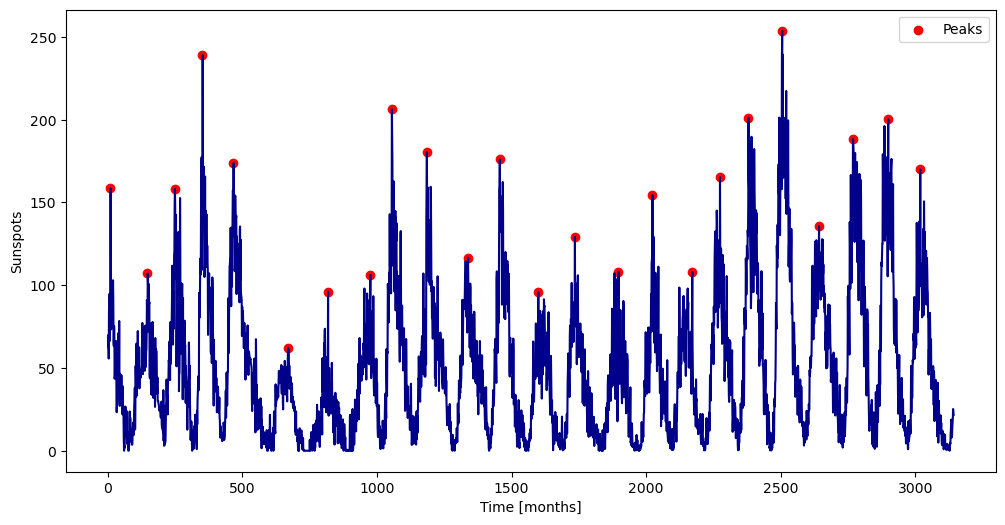

In [25]:
# Ploting 
fig, ax = plt.subplots(figsize = (12, 6))

ax.scatter(month_peak, sunspot_peak, color = 'red', label = 'Peaks')
ax.plot(time_month, sunspots, color = 'darkblue', linestyle = '-')

ax.set_xlabel('Time [months]')
ax.set_ylabel('Sunspots')

#ax.set_xlim(400, 700)
plt.legend(loc='best')

plt.show()

#### (f)
Write a funtion that calculates the average of the distance between consecutive peaks. Such average will be the first estimate for the length of the Solar cycle. Call your funtion and print the value.


In [26]:
# Define the function
def average_distance(month_peak):
    """
    Function to calculate the average 
    distance between consecutive peaks.
    Input: month_peak
    Output: mean_dist
    """
    
    # Compute the distance between consecutive peaks 
    distances = np.diff(month_peak)
    
    # Compute the average distance
    mean_dist = np.mean(distances)
    
    return mean_dist, distances

In [27]:
# Call the function 
solar_cycle_1, distance_1 = average_distance(month_peak)

# print the result 
print("The solar cycle analysis 1:")
print(f"{solar_cycle_1} months")

The solar cycle analysis 1:
130.7826086956522 months


#### Solar cycle - analysis 2:

#### (g)

Now we will use a more professional approach, which relies on Fourier analysis. Write a function that computes the Fourier transform of the sunspot data and returns the Fourier power and the respective frequencies.



In [28]:
# Define the function 
def FFT(signal):
    """
    Function to compute the Fourier transform 
    of a given signal.
    Input: signal
    Output: f_power, frequencies
    """
    f_transform = np.fft.fft(signal)
    n = len(f_transform)
    
    f_power = np.abs(f_transform)**2
    frequencies = np.fft.fftfreq(n, d = 1)
    
    return f_power, frequencies

#### (h)
Call your function and make a plot of the 1D Fourier power spectrum of the sunspot signal. Are there peaks at nonzero frequency values? What do they represent? 

In [29]:
# call the function 
f_power, frequencies = FFT(sunspots)

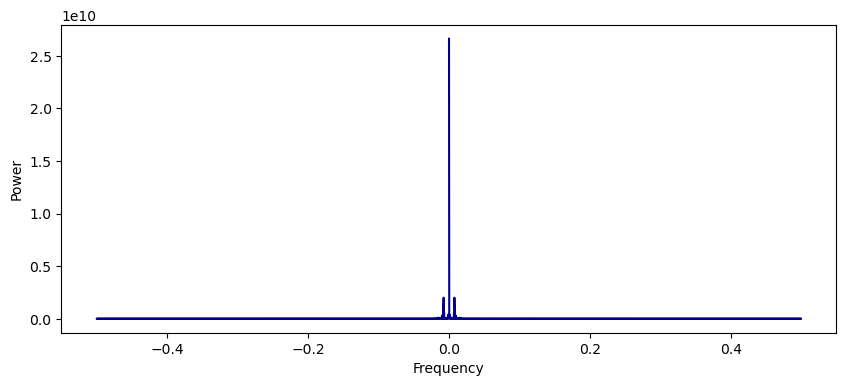

In [30]:
# Ploting 
fig, ax = plt.subplots(figsize = (10, 4))

ax.plot(frequencies, f_power, color = 'darkblue', linestyle = '-')

ax.set_xlabel('Frequency')
ax.set_ylabel('Power')

#ax.set_xlim(-0.1, 0.1)

plt.show()

Effectively, there are peaks at nonzero frequencies. These peaks may indicate the presence of
periodic components or cycles in the data that are not at the zero frequency.

#### (i)
Find the frequency of the highest nonzero peak. Using this frequency, calculate and print the Solar cycle period and compare it to the one obtained in (f).

In [31]:
# Nonzero frequencies 
nonzero_freqs = frequencies[1:]

# peaks 
nonzero_power = f_power[1:]

# Find the highest nonzero peak frequency 
freq_index = np.argmax(nonzero_power)
dominant_freq = nonzero_freqs[freq_index]

In [32]:
# Compute the period  
solar_cycle_2 = 1/dominant_freq

print("The solar cycle analysis 2:")
print(f"{solar_cycle_2} months")

The solar cycle analysis 2:
130.91666666666666 months


Now, comparing the two results:

$$\text{Solar cycle 1:}\,\, 130.7826086956522\,\,\text{months}$$

$$\text{Solar cycle 2:}\,\, 130.91666666666666\,\,\text{months}$$

we can see that the second analysis gave us a more approximated value for the solar cycle, and it is quite more fast and easy to perform rather than finding peaks almost manually in the whole data. 

#### Fourier filtering:

#### (j)
Write a function that filters outs all frequencies lower and higher than the frequency of the peak and returns the inverse Fourier transformed signal.

In [33]:
# Define the function 
def filter_function(signal): 
    """
    Function to filter the input signal by excluding frequencies lower 
    and higher than the dominant frequency.
    Input: sunspot_data (signal)
    Output: filtered signal
    """
    
    fft_signal = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_signal))
    
    filtered_fft = fft_signal.copy()
    filtered_fft[np.abs(freqs) < dominant_freq] = 0
    filtered_fft[np.abs(freqs) > dominant_freq] = 0
    
    filtered_signal = np.fft.ifft(filtered_fft)
    
    return filtered_signal.real

#### (k)
Call your funtion and make a plot. Compare it to the original signal. What kind of signal do you get and why?

In [34]:
# Call the function 
signal = filter_function(sunspots)

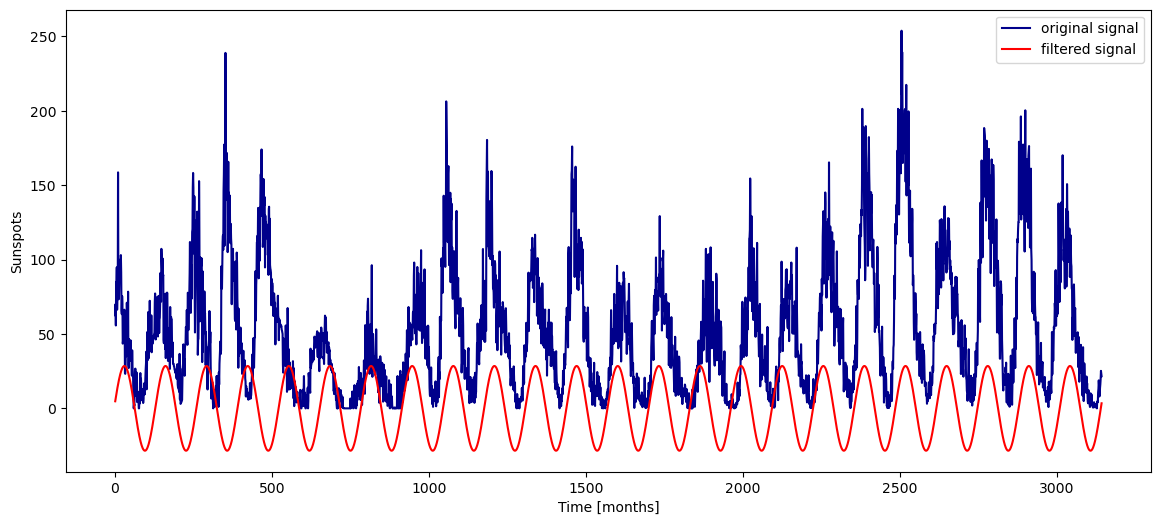

In [35]:
# Ploting 
fig, ax = plt.subplots(figsize = (14, 6))

ax.plot(time_month, sunspots, color = 'darkblue', linestyle = '-', label = 'original signal')

ax.plot(time_month, signal, color = 'red', linestyle = '-', label = 'filtered signal')

ax.set_xlabel('Time [months]')
ax.set_ylabel('Sunspots')

plt.legend(loc='best')
#ax.set_xlim(1000, 1500)

plt.show()

After filtering the signal, and comparing with the original signal, we can see that we got a sinuoidal signal. This is because we isolated the dominat frequency, which corresponds to periodic signal of the solar cycle, therefore we end up getting a sinuoidal signal with a period corresponding to that of the solar cycle.

## PART 2 (take-home):

## Name:

## 3. (10 points) : Removing artefacts from scientific images

This problem consist of using Fourier analysis to remove undesired artefacts from scientific images of the Moon.

The file provided below **First_View_of_Earth_from_Moon3.jpeg** contains an image of the Moon, taken by one of the Lunar Orbiter satellites (1966 - 1967). The Lunar Orbiters (https://nssdc.gsfc.nasa.gov/planetary/lunar/lunarorb.html) were mapping the Moon by taking pictures with film cameras. The film was scanned by a machine on the satellite and sent back to Earth through radio signals. Because of the scanning method there are clear artefacts in the images. Your task is to remove them.

#### Download image file:

https://github.com/wbandabarragan/computational-physics-1/blob/main/exams/data_sets/First_View_of_Earth_from_Moon3.jpeg

#### Image I/O:

(a) Write a python function that reads the data from the **First_View_of_Earth_from_Moon3.jpeg** file, selects and plots one of the 3 layers of the image and returns that image layer as a python array.

(b) Briefly comment, what type of artefacts do you see in the image?


#### 2D Fourier transform:

(c) Create a function that Fourier transforms this image and returns a two-panel figure with the original image on the left and a labeled 2D plot of its Fourier image on the right.

(d) Make a slice through the middle of the Fourier image in the same direction as the artefacts and plot the result. 

(e) Briefly comment, how do the image artefacts look in Fourier space?

#### Masking and filtering:

(f) Create an appropriate mask for the Fourier image that matches the features associated with the image artefacts. Plot the mask.

(g) Use your mask from (f) to remove the artefacts from the Fourier image.

(h) Inverse Fourier transform the masked Fourier image and make a two-panel figure showing the original image on the left and the new filtered image (without the artefacts) on the right.

#### Artefact-free image:

(i) Create a function that combines all the previous steps. The function should receive an image file, apply the filter and plot the original and the filtered images. 

(j) Apply the filter function from (i) to the other two channels of the image. Using the output clean images, reconstruct the 3-layered image and make a two panel figure showing the original 3-layered image and your new artefact-free 3-layered image.

#### Image I/O:

#### (a)
Write a python function that reads the data from the **First_View_of_Earth_from_Moon3.jpeg** file, selects and plots one of the 3 layers of the image and returns that image layer as a python array.


In [36]:
# define the function 
def read_image(filename, layer):
    """
    Function to read the data from the First_View_of_Earth_from_Moon3.jpeg file and 
    select the one of the 3 layers of the image and generate a plot.
    Input: filename, layer
    Output: image_layer, plt
    """
    
    # open the image 
    image = Image.open(filename)
    
    # convert the image to numpy array 
    image_array = np.array(image) 
    
    # select the layer 
    image_layer = image_array[:,:,layer]
    
    # plot the selected layer 
    plt.figure(figsize=(10, 9))
    plt.imshow(image_layer, cmap = "gray")
    
    return image_layer, plt

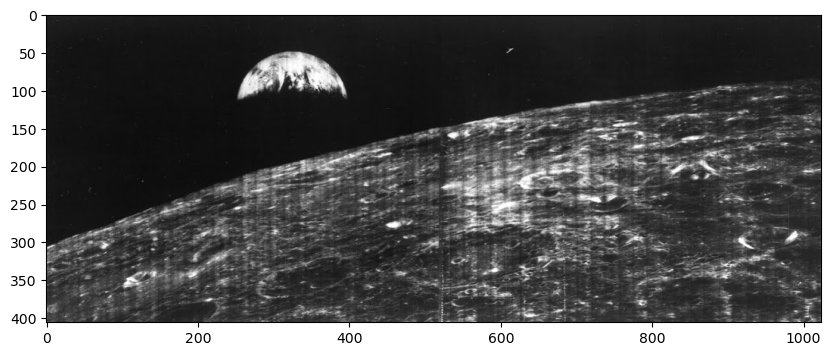

In [37]:
# callling the function 
layer_0, plt = read_image("./First_View_of_Earth_from_Moon3.jpeg", 0)
plt.show()

In [55]:
print(layer_0.shape)

(406, 1024)


#### (b)
Briefly comment, what type of artefacts do you see in the image?

In the image, we can see some artifacts like periodic vertical lines which makes the image kinda noisy.

#### 2D Fourier transform:

#### (c)
Create a function that Fourier transforms this image and returns a two-panel figure with the original image on the left and a labeled 2D plot of its Fourier image on the right.

In [38]:
# Function to compute the Fourier transform 

def FourierTransform(image):
    """
    Funtion to compute the Fourier transform of 
    a 2D array. 
    Input: image
    Output: norm_fourier, shifted_fourier
    """
    
    # Compute the fourier transform 
    fourier = np.fft.fft2(image)

    # shift the fourier transform
    shifted_fourier = np.fft.fftshift(fourier)
    
    # take abs 
    norm_fourier = np.abs(shifted_fourier)
    
    return norm_fourier, shifted_fourier # I will use shifted_fourier for the masking 

In [39]:
def two_plot(image):
    """
    Function to generate a two-panel plot containing the 
    map of the 2D array and its Fourier transform.
    Input: image
    Output: fig. ax 
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 7))

    # Plot density map on the first subplot
    z1 = ax[0].pcolor(image, cmap="gray")
    
    ax[0].set_title("Moon Scan", fontsize = 14)
    ax[0].invert_yaxis()  # Invert the y-axis
    cb1 = plt.colorbar(z1)

    # Plot Fourier transform on the second subplot
    FT, shift = FourierTransform(image)
    
    z = ax[1].pcolor(np.log10(FT) ,shading='auto', cmap="Blues")
    
    ax[1].set_title("Fourier Transform", fontsize = 14)
    cb = plt.colorbar(z)
    
    # Adjust the layout for better spacing between the subplots
    plt.tight_layout()

    return fig, ax 

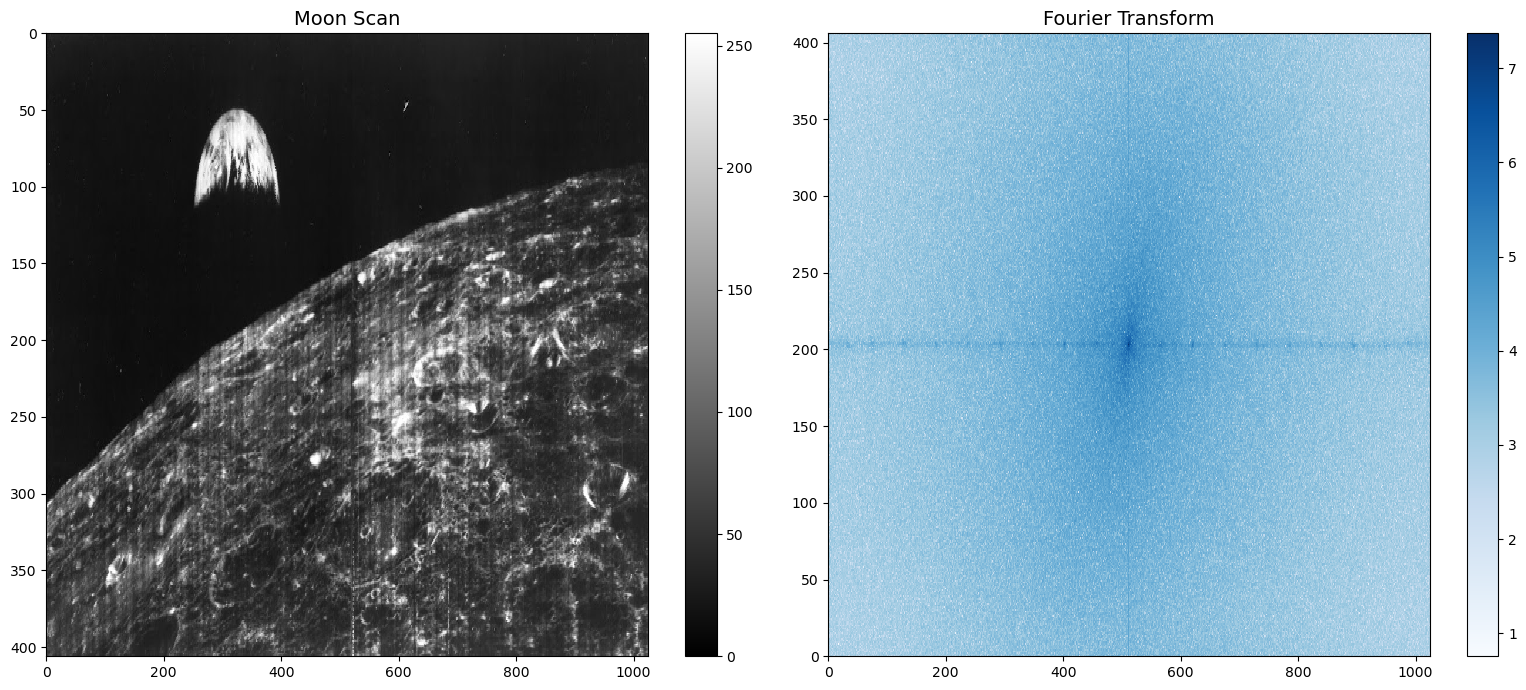

In [40]:
# Call the function 
fig1, ax1 = two_plot(layer_0)

#### (d)
Make a slice through the middle of the Fourier image in the same direction as the artefacts and plot the result. 


In [41]:
# Call the FourierTransform function 
norm_fourier, shifted_fourier = FourierTransform(layer_0)

# Find the middle row index
middle_row = norm_fourier.shape[0]//2

# Take the 1D slice along the middle row 
slice_fourier1 = norm_fourier[middle_row,:]

print(norm_fourier.shape[1])
print(middle_row)

1024
203


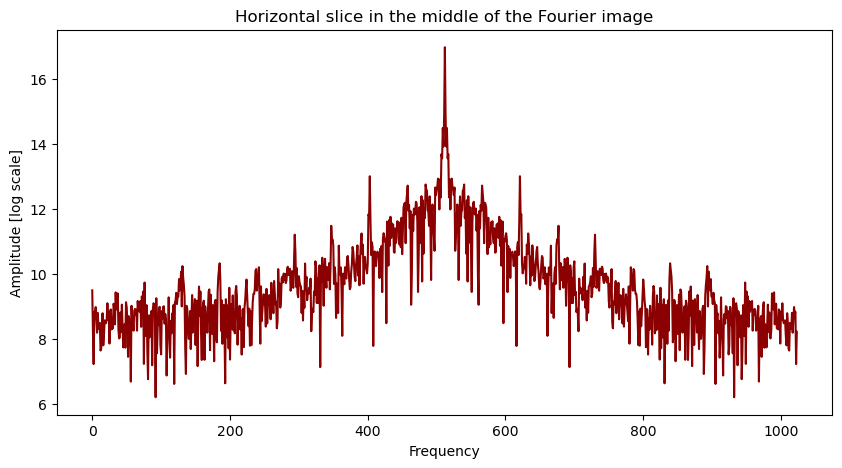

In [42]:
# plotting
fig, ax = plt.subplots(figsize = (10, 5))

ax.plot(np.log(slice_fourier1), color = 'darkred')
ax.set_title('Horizontal slice in the middle of the Fourier image')
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude [log scale]')

#ax.set_xlim(500, 525)
plt.show()

In [43]:
# Find the middle column index
middle_column = norm_fourier.shape[1]//2

# Take the 1D slice along the middle column
slice_fourier2 = norm_fourier[:, middle_column]
print(middle_column)

512


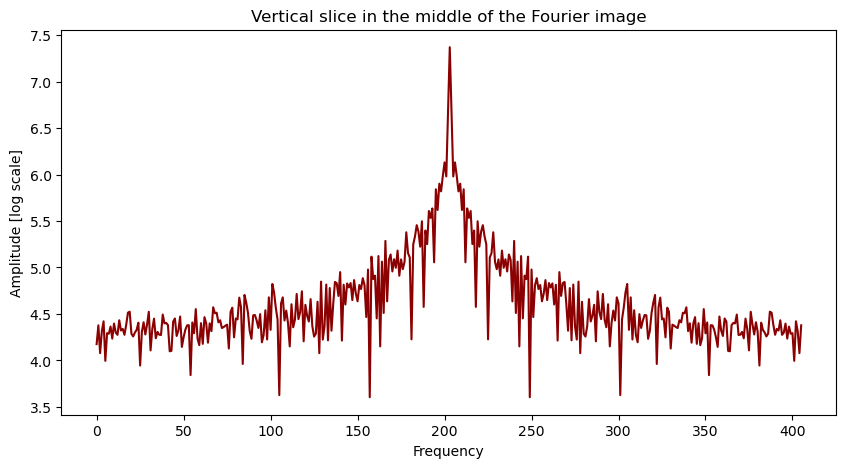

In [44]:
# plotting
fig, ax = plt.subplots(figsize = (10, 5))

ax.plot(np.log10(slice_fourier2), color = 'darkred')
ax.set_title('Vertical slice in the middle of the Fourier image')
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude [log scale]')

plt.show()

#### (e)
Briefly comment, how do the image artefacts look in Fourier space?

From the horizontal slice, and from the fourier image we can say that the artifacts look like frequencies evenly espaced alogn the horizontal axis. If we see the horizontal slice, we can see the frequencies that look symmetric. I think this is because the artifacts are periodic noise, so they look like this in fourier space. Also, as I mentioned in the previious exercise, peaks at nonzero frequency are related to periodic behavoiur. 

#### Masking and filtering:

#### (f)
Create an appropriate mask for the Fourier image that matches the features associated with the image artefacts. Plot the mask.


Ok, so we defined what are the frequencies related to the artifacts, so my best approach was to create a rectangurar mask along the horizontal axis, avoiding the frequencies in the middle point of the fourier image, because I was getting a blured image. So the mask has two rectangles (almost lines) filled with zeros, so by multiplying by the fourier image I get rid of the frequecies. 

In [127]:
# Creating the mask 
def mask_function(image):
    """
    Function to create a mask to get rid of the image artefacts.
    Input: image
    Output: mask_artifacts
    """
    # Create a new image
    im2 = Image.new(mode="RGB", size=(image.shape[1], image.shape[0]))

    # Draw two rectangles, one to the left and one to the right, with nothing in the center
    draw = ImageDraw.Draw(im2)
    rect_width = 1024
    rect_height = 8

    center_x = im2.width // 2
    center_y = im2.height // 2

    left_rect_x1 = center_x - rect_width - 10
    left_rect_x2 = center_x - 8
    left_rect_y1 = center_y - rect_height // 2
    left_rect_y2 = center_y + rect_height // 2

    right_rect_x1 = center_x + 8
    right_rect_x2 = center_x + rect_width + 10
    right_rect_y1 = center_y - rect_height // 2
    right_rect_y2 = center_y + rect_height // 2

    draw.rectangle((left_rect_x1, left_rect_y1, left_rect_x2, left_rect_y2), fill=(255, 0, 0))
    draw.rectangle((right_rect_x1, right_rect_y1, right_rect_x2, right_rect_y2), fill=(255, 0, 0))


    # Convert the image to a binary mask (0s and 1s)
    mask = np.array(im2)[:,:,0] // 255
    
    # transform the mask so it takes rid of the frequencies
    mask_new = - mask + 1
    
    return mask_new 

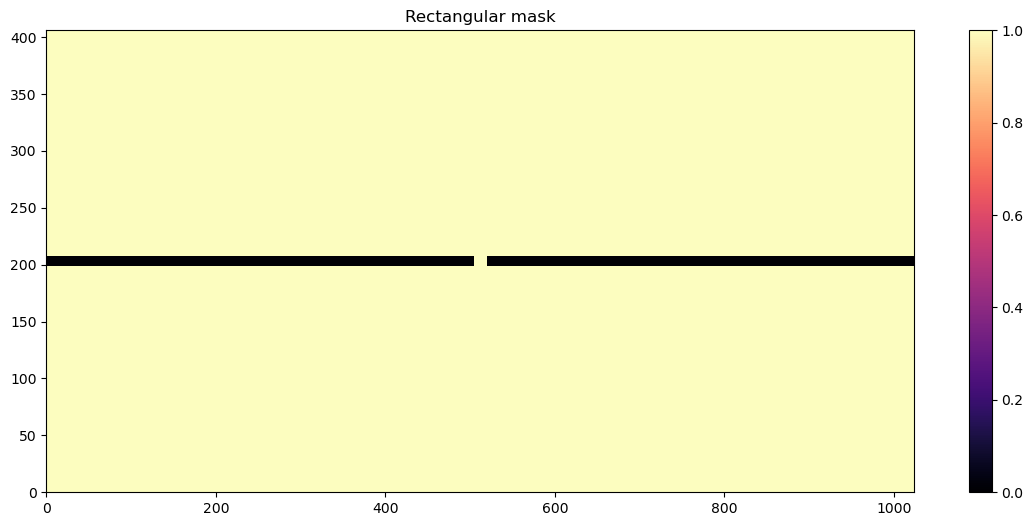

In [128]:
# Call the function 
rec_mask = mask_function(layer_0)

# Display the mask
plt.figure(figsize = (14,6))

Z1 = plt.pcolor(rec_mask, shading='auto', cmap ="magma")
plt.colorbar(Z1)

plt.title("Rectangular mask")
    
plt.show()

#### (g)
Use your mask from (f) to remove the artefacts from the Fourier image.

In [129]:
# let's plot the original fourier image and the masked fourier image 
def fourier_two_plot(image):
    """
    Function to generate a two-panel plot containing the 
    original fourier image and the masked fourier image of 
    and 2D array
    Input: image
    Output: fig. ax 
    """
    
    # Plot Fourier transform on the second subplot
    FT1, shift = FourierTransform(image)
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 7))
    # original fourier image 
    z1 = ax[0].pcolormesh(np.log10(FT1), shading='auto', cmap="Blues")
    
    ax[0].set_title("Original fourier image", fontsize = 14)
    #ax[0].invert_yaxis()  # Invert the y-axis
    cb1 = plt.colorbar(z1)

    masked_shift = shift * rec_mask
    FT2 = np.abs(masked_shift)
    # masked fourier image
    z = ax[1].pcolormesh( np.log10(FT2), shading='auto', cmap="Blues")
    
    ax[1].set_title("Masked Fourier image", fontsize = 14)
    cb = plt.colorbar(z)
    
    # Adjust the layout for better spacing between the subplots
    plt.tight_layout()

    return fig, ax 

/tmp/ipykernel_9913/3881112288.py:25: RuntimeWarning: divide by zero encountered in log10
  z = ax[1].pcolormesh( np.log10(FT2), shading='auto', cmap="Blues")


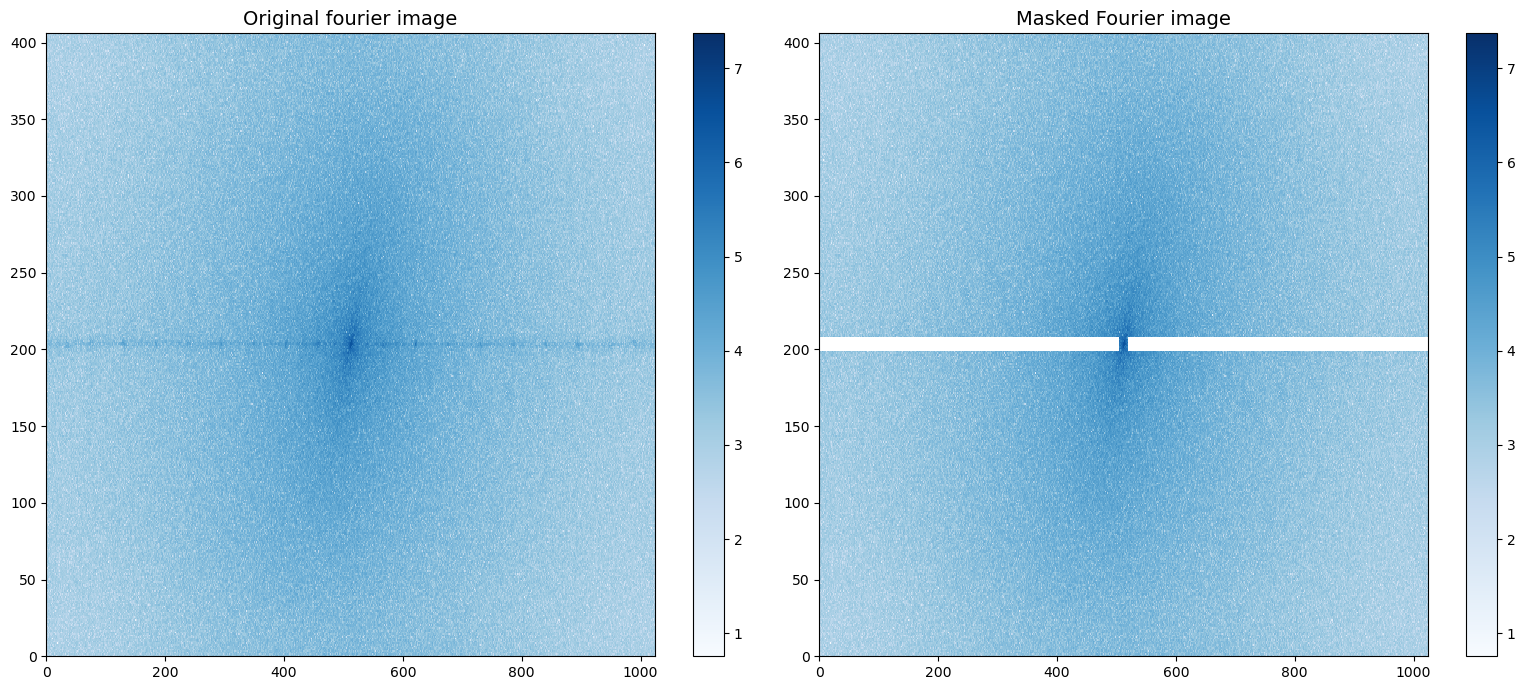

In [130]:
# Plotting 
fig2, ax2 = fourier_two_plot(layer_0)

plt.show()

#### (h)
Inverse Fourier transform the masked Fourier image and make a two-panel figure showing the original image on the left and the new filtered image (without the artefacts) on the right.

In [131]:
# Perform Fourier transform of the image layer 
norm_fourier, ft_shifted = FourierTransform(layer_0)

# apply the mask
filtered_FT3 = ft_shifted * rec_mask

# compute the inverse fourier transform 
filtered_image_3 = np.fft.ifft2(np.fft.ifftshift(filtered_FT3))

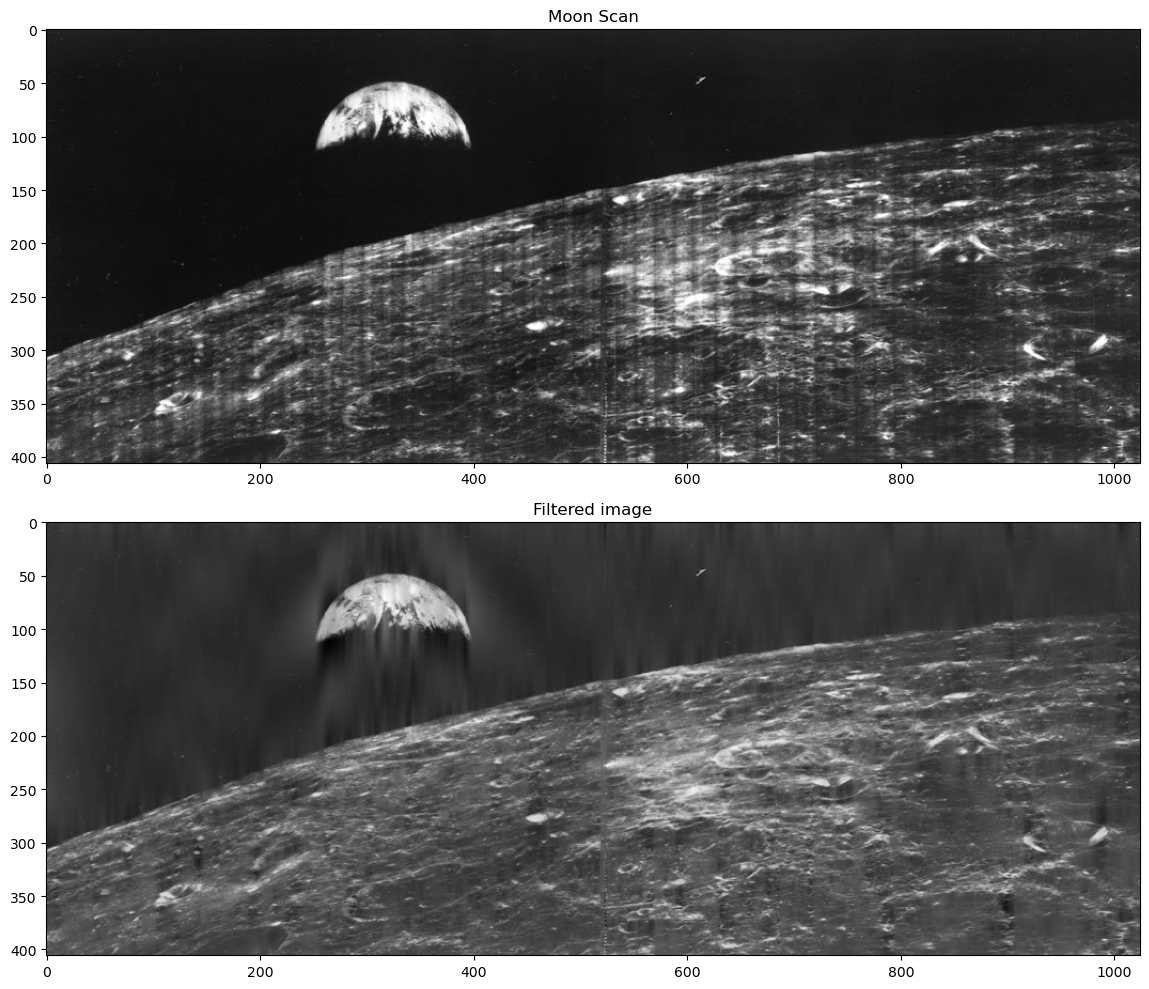

In [133]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'wspace': 0})

# Plot the original scan
z1 = axes[0].imshow(layer_0, cmap="gray")
axes[0].set_title("Moon Scan", fontsize = 12)
#axes[0].invert_yaxis()  # Invert the y-axis
#cb1 = plt.colorbar(z1, ax=axes[0], orientation='vertical', shrink=0.6)

# Plot on the second subplot
z2 = axes[1].imshow(filtered_image_3.real, cmap ="gray")
axes[1].set_title("Filtered image", fontsize = 12)
#cbar2 = plt.colorbar(z2, ax=axes[1], orientation='vertical', shrink=0.6)

# Adjust vertical spacing between subplots
plt.subplots_adjust(hspace=0.2)  # Adjust the value as needed
plt.tight_layout()
plt.savefig("./moon-fft")
plt.show()

#### Artefact-free image:

#### (i)
Create a function that combines all the previous steps. The function should receive an image file, apply the filter and plot the original and the filtered images. 



In [100]:
# Let's write the function 
def artifact_remover(filename, layer):
    
    # READ THE IMAGE IN THE GIVEN LAYER
    ################################################
    # open the image 
    image = Image.open(filename)
    # convert the image to numpy array 
    image_array = np.array(image) 
    # select the layer 
    image_layer = image_array[:,:,layer]

    # COMPUTE THE FOURIER TRANSFORM
    ################################################ 
    
    # Compute the fourier transform 
    fourier = np.fft.fft2(image_layer)
    # shift the fourier transform
    ft_shifted = np.fft.fftshift(fourier)

    # DEFINE THE MASK 
    ###############################################
    # call the mask_function
    mask_artifact = mask_function(image_layer)

    # APPLY THE MASK 
    ###############################################
    # apply the mask
    filtered_FT = ft_shifted * mask_artifact
    # compute the inverse fourier transform 
    filt_image = np.fft.ifft2(np.fft.ifftshift(filtered_FT))
    # take the real part 
    #filtered_image_2 = filtered_image_1.real
    
    # PLOTTING  
    ###############################################
    fig, axes = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'wspace': 0})
    # Plot the original scan
    z1 = axes[0].imshow(image_layer, cmap="gray", vmin=0, vmax=250)
    axes[0].set_title(f"Original Image [Layer {layer}]", fontsize = 12)
    #axes[0].set_xlabel("x")
    #axes[0].set_ylabel("y")
    #axes[0].invert_yaxis()  # Invert the y-axis
   # cb1 = plt.colorbar(z1, ax=axes[0], orientation='vertical', shrink=0.6)

    # Plot on the second subplot
    z2 = axes[1].imshow(filt_image.real, cmap ="gray", vmin=0, vmax=250)
    axes[1].set_title(f"Filtered image [Layer {layer}]", fontsize = 12)
    #cbar2 = plt.colorbar(z2, ax=axes[1], orientation='vertical', shrink=0.6)

    # Adjust vertical spacing between subplots
    plt.subplots_adjust(hspace=0.1)  # Adjust the value as needed
    plt.tight_layout()
    
    return image_layer, filt_image.real, fig, axes

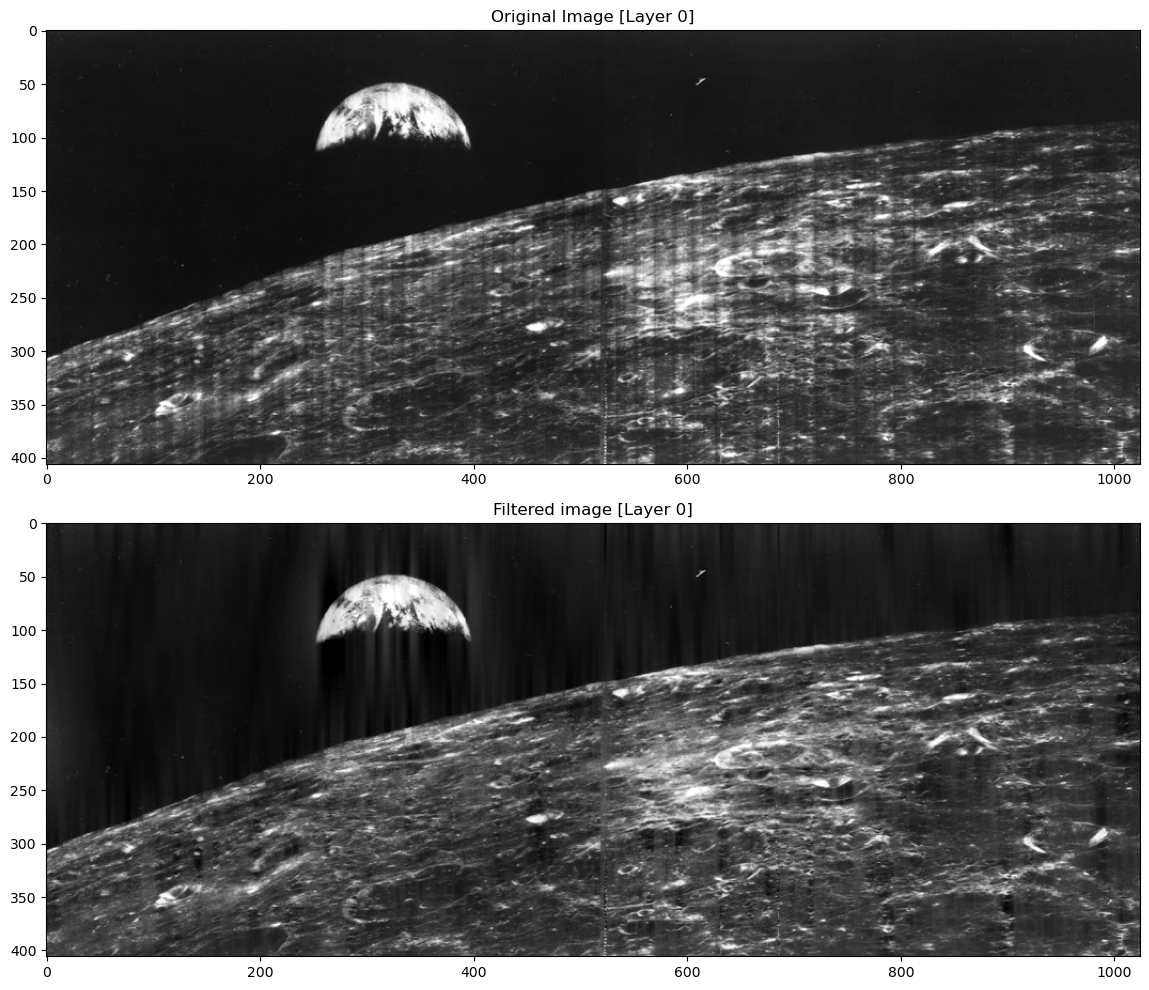

In [63]:
# Call the function
image1, ft_image, fig, axes = artifact_remover("./First_View_of_Earth_from_Moon3.jpeg", 0)
plt.show()

#### (j)
Apply the filter function from (i) to the other two channels of the image. Using the output clean images, reconstruct the 3-layered image and make a two panel figure showing the original 3-layered image and your new artefact-free 3-layered image.

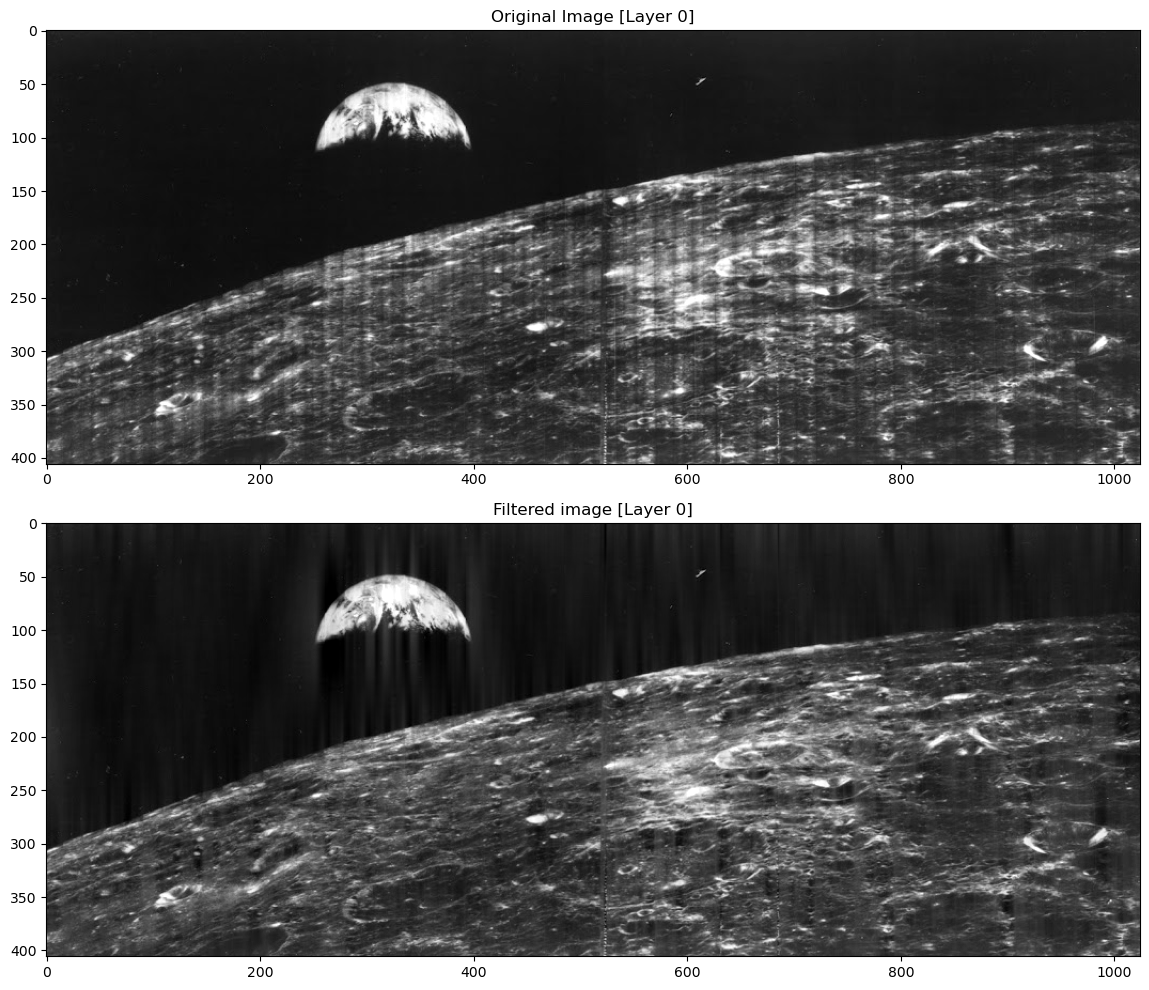

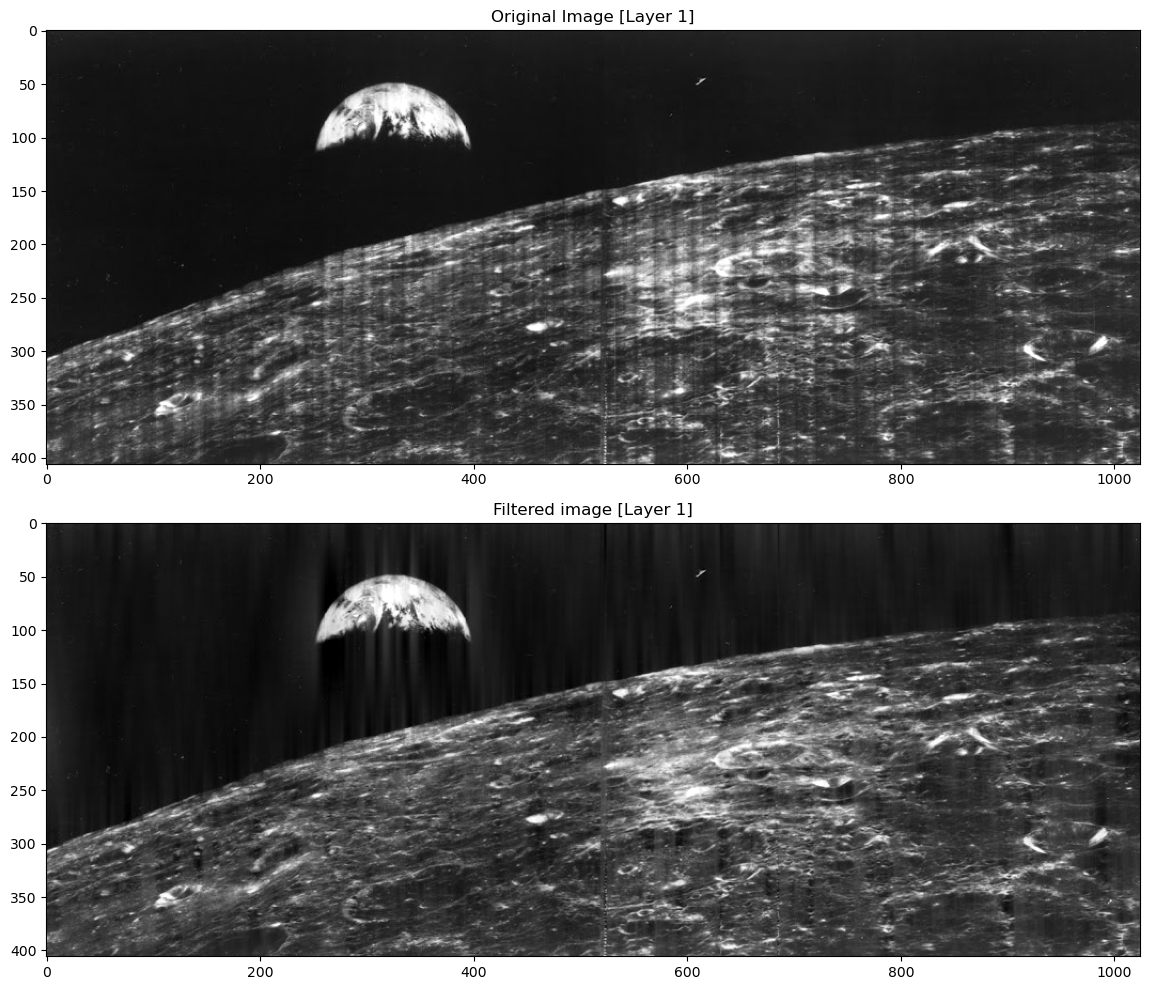

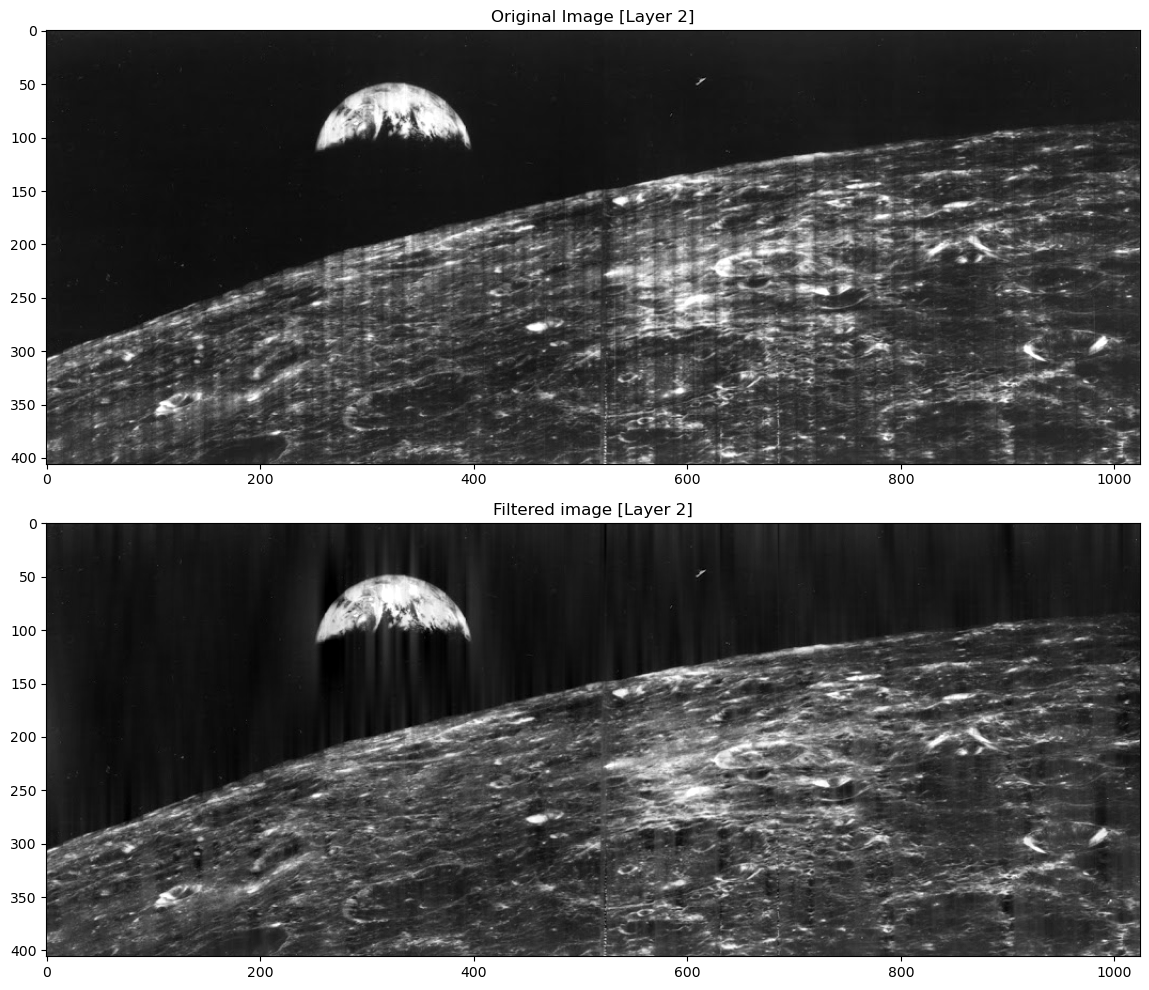

In [53]:
# I just want the arrays to reconstruct the 3-layered image for both cases 
# Layer 0 

image_0, filtered_image_0, fig_0, axes_0 = artifact_remover("./First_View_of_Earth_from_Moon3.jpeg", 0)

# Layer 1 
image_1, filtered_image_1, fig_1, axes_1 = artifact_remover("./First_View_of_Earth_from_Moon3.jpeg", 1)

# Layer 2 
image_2, filtered_image_2, fig_2, axes_2 = artifact_remover("./First_View_of_Earth_from_Moon3.jpeg", 2)

# Reconstruct the original image 
original_image = np.stack((image_0, image_1, image_2), axis=-1)

# New atenuated image
filtered_image = np.zeros((406, 1024, 3), dtype = int)
# Reconstruct the filtered image 
filtered_image[:, :, 0] = filtered_image_0
filtered_image[:, :, 1] = filtered_image_1
filtered_image[:, :, 2] = filtered_image_2 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


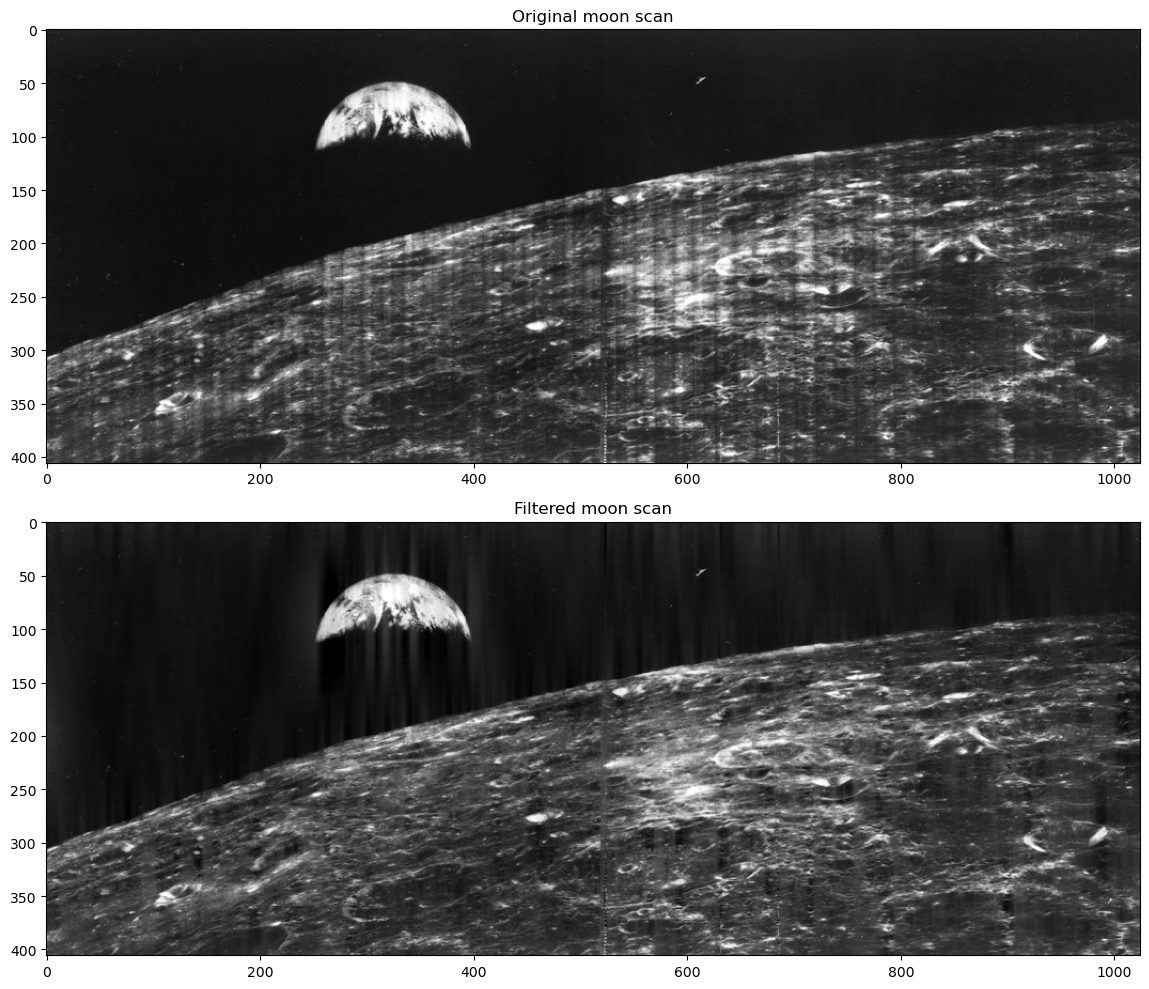

In [54]:
# Plotting both the original image and the filtered image 
fig, axes = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'wspace': 0})

# Plot the original scan
z1 = axes[0].imshow(original_image, cmap="gray")
axes[0].set_title("Original moon scan", fontsize = 12)
#axes[0].invert_yaxis()  # Invert the y-axis
#cb1 = plt.colorbar(z1, ax=axes[0], orientation='vertical', shrink=0.6)

# Plot on the second subplot
z2 = axes[1].imshow(filtered_image, cmap ="gray")
axes[1].set_title("Filtered moon scan", fontsize = 12)
#cbar2 = plt.colorbar(z2, ax=axes[1], orientation='vertical', shrink=0.6)

# Adjust vertical spacing between subplots
plt.subplots_adjust(hspace=0.2)  # Adjust the value as needed
plt.tight_layout()
plt.show()